# MODEL 2 - ITAS

ITAS is a `ARIMA` model which is used to predict the future count of the patient by analysing the tread

In [1]:
# imports
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Generate date range from 2023-01-01 to 2024-12-31
date_range = pd.date_range(start='2023-01-01', end='2024-01-01', freq='D')

# Create a DataFrame with random values for the "crowd" column
df = pd.DataFrame({
    'Crowd': np.random.randint(0, 21, size=len(date_range))
})

# Write the DataFrame to a CSV file
df.to_csv('itas.csv', index=False)

# Display the DataFrame
print(df.head())

   Crowd
0      1
1      6
2     12
3     19
4     19


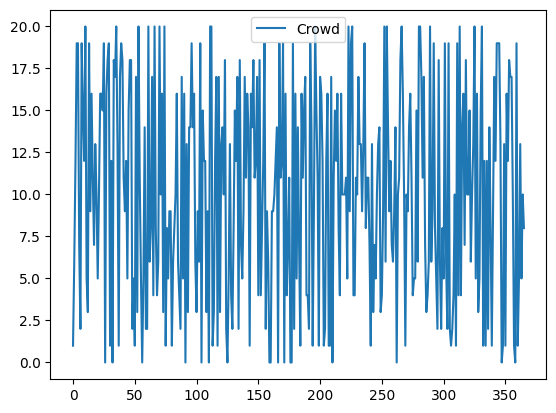

In [3]:
df = pd.read_csv('itas.csv',)
df.plot()
plt.show()

In [4]:
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit()

                               SARIMAX Results                                
Dep. Variable:                  Crowd   No. Observations:                  366
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1217.861
Date:                Sat, 09 Mar 2024   AIC                           2447.723
Time:                        20:59:43   BIC                           2471.122
Sample:                             0   HQIC                          2457.022
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8972      0.053    -17.056      0.000      -1.000      -0.794
ar.L2         -0.6936      0.067    -10.421      0.000      -0.824      -0.563
ar.L3         -0.5831      0.070     -8.290      0.0

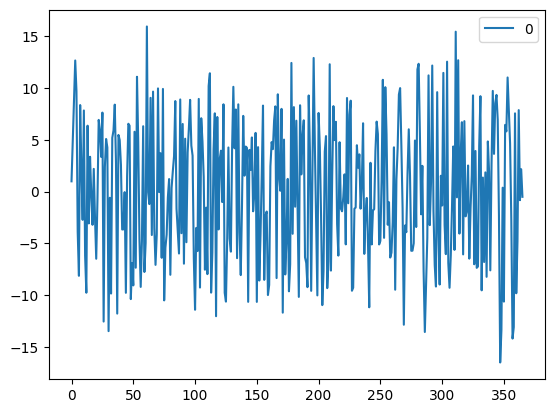

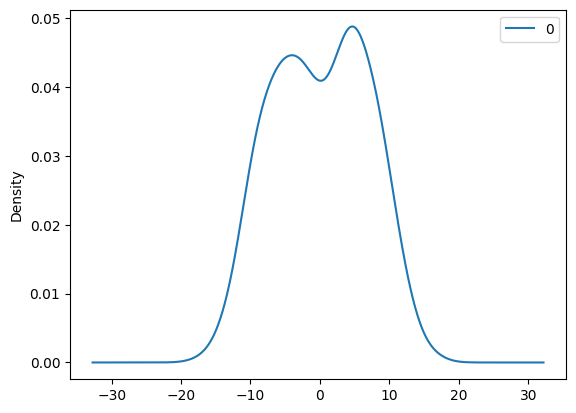

                0
count  366.000000
mean     0.045437
std      6.807061
min    -16.508340
25%     -5.712484
50%     -0.043441
75%      5.379204
max     15.965442


In [5]:
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [6]:
output = model_fit.forecast()
math.ceil(output.values[0])

7

In [7]:
model_fit.save('model.pkl')